In [55]:
# Import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# With Preprocessing

In [56]:
# Read the csv file
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [57]:
# Control nan values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [58]:
# Control missing outliers
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [59]:
df.shape

(21613, 21)

In [60]:
# Removing outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    min_threshold = Q1 - IQR * 1.5
    max_threshold = Q3 + IQR * 1.5

    df_no_outlier = df[(df[column] > min_threshold) & (df[column] < max_threshold)]
    return df_no_outlier

In [61]:
outlier_columns = ['price', 'sqft_lot15']
for column in outlier_columns:
    df_no_outlier = remove_outliers(df_no_outlier, column)
df_no_outlier.shape

(17840, 21)

In [62]:
df_no_outlier.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.784000e+04,17840.000000,17840.000000,17840.000000,17840.000000,1.784000e+04,17840.000000,17840.000000,17840.000000,17840.000000,17840.000000,17840.000000,17840.000000,17840.000000,17840.000000,17840.000000,17840.000000,17840.000000,17840.000000,17840.000000
mean,4.746444e+09,456458.577971,3.304652,2.012332,1889.463733,7.668430e+03,1.470376,0.001401,0.140247,3.402747,7.434865,1631.104652,258.359081,1969.978251,68.897926,98081.587724,47.559487,-122.227893,1848.676850,6953.503756
std,2.874889e+09,190767.667280,0.916407,0.697068,709.777625,1.016082e+04,0.542033,0.037409,0.567695,0.647074,0.951787,667.581223,391.174990,29.923892,364.343054,53.894561,0.138709,0.132505,567.706689,2905.084695
min,1.000102e+06,78000.000000,0.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.475000,620.000000,651.000000
25%,2.310031e+09,306000.000000,3.000000,1.500000,1360.000000,4.800000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1140.000000,0.000000,1950.000000,0.000000,98033.000000,47.471800,-122.336000,1440.000000,4944.000000
50%,4.058800e+09,424725.000000,3.000000,2.000000,1790.000000,7.153000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1460.000000,0.000000,1971.000000,0.000000,98074.000000,47.568200,-122.266000,1740.000000,7200.000000
75%,7.508325e+09,575000.000000,4.000000,2.500000,2320.000000,9.170500e+03,2.000000,0.000000,0.000000,4.000000,8.000000,1980.000000,500.000000,1997.000000,0.000000,98119.000000,47.680600,-122.151000,2170.000000,8800.000000
max,9.900000e+09,987000.000000,33.000000,7.500000,5820.000000,1.024068e+06,3.500000,1.000000,4.000000,5.000000,11.000000,5370.000000,2220.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,4950.000000,14910.000000


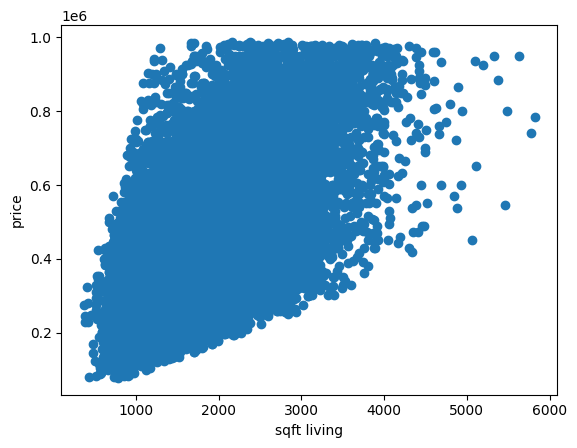

In [63]:
# Visualization for linear
plt.xlabel('sqft living')
plt.ylabel('price')
plt.scatter(df_no_outlier.sqft_living, df_no_outlier.price)
plt.draw()

### There is linear between sqft_living and price

In [80]:
# Split the data train and test
from sklearn.model_selection import train_test_split
x = df_no_outlier.drop(['id', 'price', 'date'], axis=1)
y = df_no_outlier['price']
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=10)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=10)

In [81]:
# Fit data to the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.6938141956711158

In [82]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso()
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

0.6938159653048733

In [83]:
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.6938902168826002

In [84]:
from sklearn.preprocessing import PolynomialFeatures
lr = LinearRegression()
lr.fit(X_train_poly, y_train)
lr.score(X_test_poly, y_test)

0.6938141956711158

# Without Preprocessing

In [121]:
# Read the csv file
df = pd.read_csv('data/kc_house_data.csv')

In [106]:
# Split the data train and test
from sklearn.model_selection import train_test_split
x = df.drop(['id', 'price', 'date'], axis=1)
y = df['price']
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=10)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=10)

In [107]:
# Fit data to the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7064502347670332

In [108]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso()
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

0.7064486794897259

In [109]:
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.7063874055684238

In [110]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)
lr.score(X_test_poly, y_test)

0.7064502347670332

In [111]:
# k-fold cross validation
from sklearn.model_selection import cross_val_score
print(cross_val_score(LinearRegression(), x, y, cv=5))
print(cross_val_score(Lasso(), x, y, cv=5))
print(cross_val_score(Ridge(), x, y, cv=5))
print(cross_val_score(LinearRegression(), x_poly, y, cv=5))

[0.69615715 0.69103231 0.69273185 0.70769239 0.68534044]
[0.69615253 0.6910336  0.69273306 0.70769705 0.68533755]
[0.69600863 0.69106301 0.69276274 0.70786553 0.68528152]
[0.82929052 0.82285909 0.81576178 0.80209831 0.79452399]


### Over all without preprocessing performs better.